# Implementation

In [1]:
import torch
from d2l import torch as d2l

## Softmax

In [2]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition

X = torch.rand((2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.3034, 0.1621, 0.1535, 0.1734, 0.2075],
         [0.1911, 0.1971, 0.1879, 0.1500, 0.2739]]),
 tensor([1.0000, 1.0000]))

## Model

In [3]:
class SoftmaxRegressionScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs),
                              requires_grad=True)
        self.b = torch.zeros(num_outputs, requires_grad=True)

    def parameters(self):
        return [self.W, self.b]

@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
    X = X.reshape((-1, self.W.shape[0])) #flatten images
    return softmax(torch.matmul(X, self.W) + self.b)

## Cross Entropy Loss

In [4]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [17]:
def cross_entropy(y_hat, y):
    # y_hat[list(range(len(y_hat))), y] gives the predicted probabilities for each of the ground truth labels
    # this loss minimizes the -log of these scalars
    return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()

cross_entropy(y_hat, y)

tensor(1.4979)

In [19]:
y_hat = torch.tensor([[1.0, 0, 0], [0.0, 0.0, 1.0]])
# Should be smaller
cross_entropy(y_hat, y)

tensor(-0.)

## Training

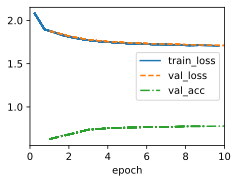

In [20]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

## Prediction

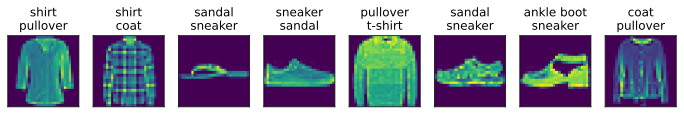

In [21]:
X, y = next(iter(data.val_dataloader()))
preds = model(X).argmax(axis=1)

wrong = preds.type(y.dtype) != y
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = [a+'\n'+b for a, b in zip(
    data.text_labels(y), data.text_labels(preds))]
data.visualize([X, y], labels=labels)

# Better Version

In [22]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [24]:
class SoftmaxRegression(d2l.Classifier):  #@save
    """The softmax regression model."""
    def __init__(self, num_outputs, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), # flatten input images
                                 nn.LazyLinear(num_outputs))

    def forward(self, X):
        return self.net(X)

@d2l.add_to_class(d2l.Classifier)  #@save
def loss(self, Y_hat, Y, averaged=True):
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    Y = Y.reshape((-1,))
    return F.cross_entropy(
        Y_hat, Y, reduction='mean' if averaged else 'none')

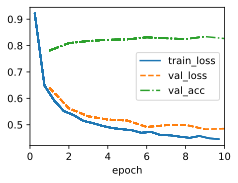

In [25]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegression(num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)